In [8]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import csv
#import os
%matplotlib inline

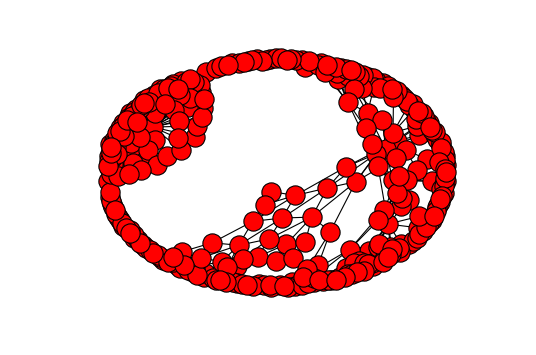

In [11]:
#code taken directly from https://zenagiwa.wordpress.com/2014/10/23/graphing-networks-for-beginners/

with open('countryBorders2.csv','rt') as heroIn: #reads in the hero-network file
    heroIn = csv.reader(heroIn)
    headers = next(heroIn)
    heroes = [row for row in heroIn]
 
uniqueHeroes = list(set([row[0] for row in heroes])) #takes the reduantices of the superhero networks
 
id=list(enumerate(uniqueHeroes))# creates a list of tuples with unique ids and their names for each superhero in the network

keys = {name: i for i, name in enumerate(uniqueHeroes)} #creates a dictionary(hash map) that maps each id to the superhero names
 
links = [] #creates a blank list
 
for row in heroes: #maps all of the names in the csv file to their id number
     try:
         links.append({keys[row[0]]: keys[row[1]]})
     except: 
         links.append({row[0]: row[1]})
 
G = nx.Graph() #creates a graph
heroNodeId=[] #takes source and target edges
for row in id:
     heroNodeId.append(row[0])

G.add_nodes_from(heroNodeId)#creates nodes for the graph.
 
for node in links:#loops through each link and changes each dictionary to a tuple so networkx can read in the information
    edges = node.items()
    G.add_edge(*edges[0])#takes the tuple from the list and unpacks the tuples
 
nx.draw(G)
plt.show(G)

In [18]:
def draw_lifted(G, pos=None, offset=0.07, fontsize=6):
    pos = nx.spring_layout(G) 
    node_colors = ["blue" if len(G.neighbors(n)) > 3 else "red" for n in G.nodes()]
    nx.draw(G, pos, font_size=fontsize, with_labels=False)
    nx.draw_networkx_nodes(G, pos=pos, node_color=node_colors)
    nx.draw_networkx_edges(G, pos=pos)
    for p in pos:  # raise text positions
        pos[p][1] += offset
    nx.draw_networkx_labels(G, pos, font_size=fontsize)
    
    plt.show()

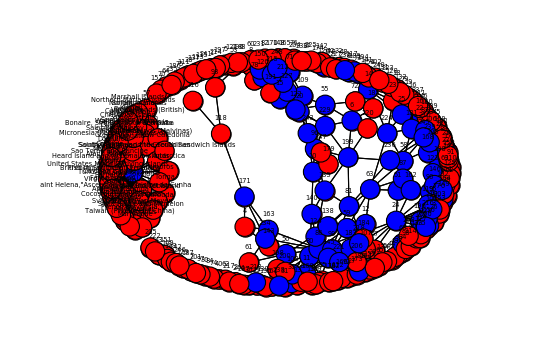

In [19]:
draw_lifted(G)

In [ ]:
nx.graphviz_layout.